<div style="background-color: #C0AFDD; color: black; text-align: center; padding: 10px; border-radius: 10px; ">
    <h1>Assignment: PCA Implementation </h1>
    
</div>

# Objective:
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

# Instructions:
Download the wine dataset from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Wine

Load the dataset into a Pandas dataframe.

Split the dataset into features and target variables.

Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

Implement PCA on the preprocessed dataset using the scikit-learn library.

Determine the optimal number of principal components to retain based on the explained variance ratio.

Visualise the results of PCA using a scatter plot.

Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

Interpret the results of PCA and clustering analysis.

# Deliverables:
Jupyter notebook containing the code for the PCA implementation.

A report summarising the results of PCA and clustering analysis.

Scatter plot showing the results of PCA.

A table showing the performance metrics for the clustering algorithm.

___

_____

# loading the data set

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv ('wine.data')
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [5]:
with open ('wine.names' , 'r') as f:
    a= f.read()
    print(a)

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [6]:
# assigning the column names according to the file

df.columns = ['target','alcohol','malic_acid','ash','alcalinity','magnesium','tot_phenols',
              'flavanoids','non_flavanoids','Proanthocyanins','color_intensity', 'hue','OD280/OD315','Proline']

In [7]:
df.head()

,target,alcohol,malic_acid,ash,alcalinity,magnesium,tot_phenols,flavanoids,non_flavanoids,Proanthocyanins,color_intensity,hue,OD280/OD315,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


# looking for some EDA and Feature Enginnering

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   target           177 non-null    int64  
 1   alcohol          177 non-null    float64
 2   malic_acid       177 non-null    float64
 3   ash              177 non-null    float64
 4   alcalinity       177 non-null    float64
 5   magnesium        177 non-null    int64  
 6   tot_phenols      177 non-null    float64
 7   flavanoids       177 non-null    float64
 8   non_flavanoids   177 non-null    float64
 9   Proanthocyanins  177 non-null    float64
 10  color_intensity  177 non-null    float64
 11  hue              177 non-null    float64
 12  OD280/OD315      177 non-null    float64
 13  Proline          177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


**We can see that 176 entries , which gives us an idea that our dataset small and all datatypes are perfectly matched with their varibles so we do not need ant change here**

# Checking some stats of the data

In [9]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
target,177.0,1.943503,0.773991,1.00,1.00,2.00,3.00,3.00
alcohol,177.0,12.993672,0.808808,11.03,12.36,13.05,13.67,14.83
malic_acid,177.0,2.339887,1.119314,0.74,1.60,1.87,3.10,5.80
ash,177.0,2.366158,0.275080,1.36,2.21,2.36,2.56,3.23
alcalinity,177.0,19.516949,3.336071,10.60,17.20,19.50,21.50,30.00
magnesium,177.0,99.587571,14.174018,70.00,88.00,98.00,107.00,162.00
tot_phenols,177.0,2.292260,0.626465,0.98,1.74,2.35,2.80,3.88
flavanoids,177.0,2.023446,0.998658,0.34,1.20,2.13,2.86,5.08
non_flavanoids,177.0,0.362316,0.124653,0.13,0.27,0.34,0.44,0.66
Proanthocyanins,177.0,1.586949,0.571545,0.41,1.25,1.55,1.95,3.58


# Vizulazing the correlation amoung the features

<AxesSubplot: >

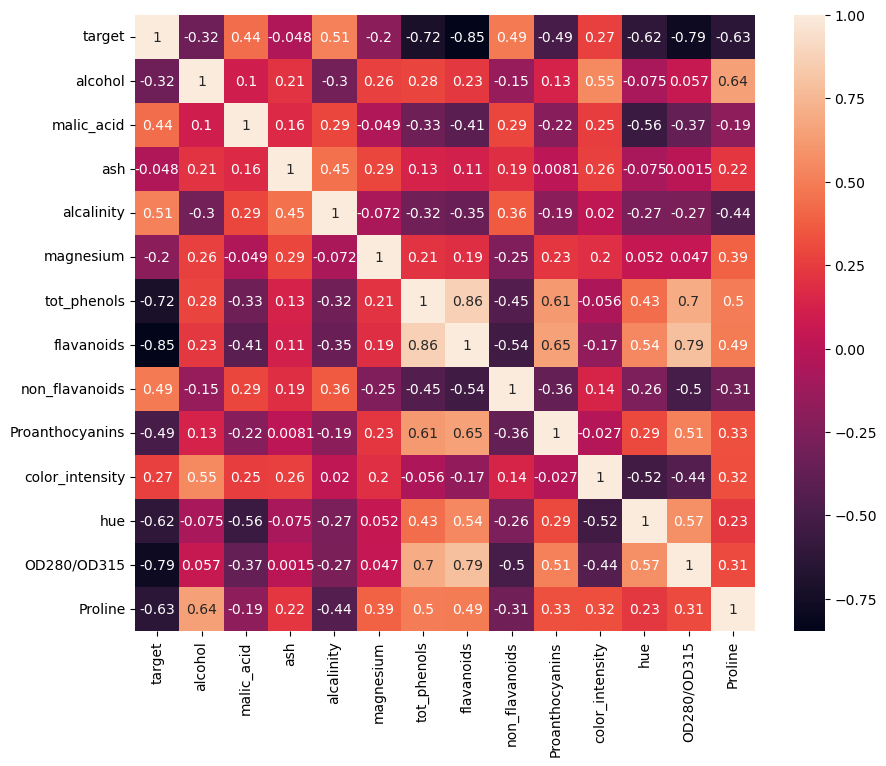

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr() , annot= True )

# Search for Null Values

In [11]:
df.isnull().sum()

target             0
alcohol            0
malic_acid         0
ash                0
alcalinity         0
magnesium          0
tot_phenols        0
flavanoids         0
non_flavanoids     0
Proanthocyanins    0
color_intensity    0
hue                0
OD280/OD315        0
Proline            0
dtype: int64

# we did not find any null value here.

# Is there any duplicates ?


In [12]:
df.duplicated().sum()

0

**No, we did'nt find any duplicate**

# Defining the features and target varibles as X ans Y

In [75]:
x = df.drop(['target'] , axis =1)
y= df[['target']]


# spliting the data into train data and test data

***Note : While traditional train-test splitting for model evaluation might not be the goal in PCA, separating the data into training and test sets is still important for proper scaling and avoiding data leakage during the dimensionality reduction process.***

In [90]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train ,y_test = train_test_split( x, y , test_size=0.22 , random_state=42)

# Performing the data scaling

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

# PCA implimention

In [111]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)

x_pca = pca.fit_transform(x_train_scaled)


In [112]:
# showing the total captured verience
pca.explained_variance_ratio_

array([0.35346059, 0.19556472, 0.11598086, 0.07347359, 0.06327196,
       0.05417077, 0.03829969, 0.02810165, 0.02360587])

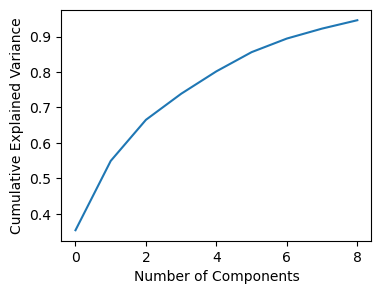

In [113]:
# visulize the captured vareince

import numpy as np
# function cumsum calculate the cumulative sum of values of varience components
comulative_sum  = np.cumsum(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.plot(comulative_sum)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.show()

# Visualise the results of PCA using a scatter plot


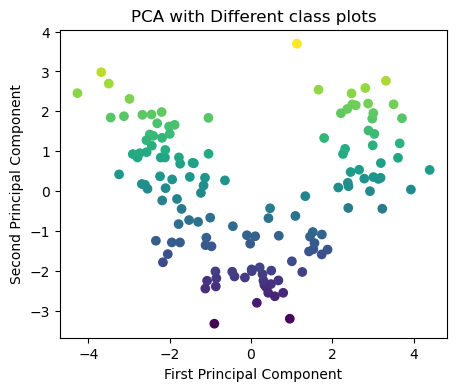

In [117]:
colors = ['red', 'green','blue']
plt.figure(figsize=(5,4))
plt.scatter(x_pca[:,0], x_pca[:,1], c =x_pca[:,1], cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA with Different class plots')
plt.show()

# Perform K-means clustering

In [130]:
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(x_pca)

y_pred= km.predict(x_pca)

# visulize the results of k-means clustering

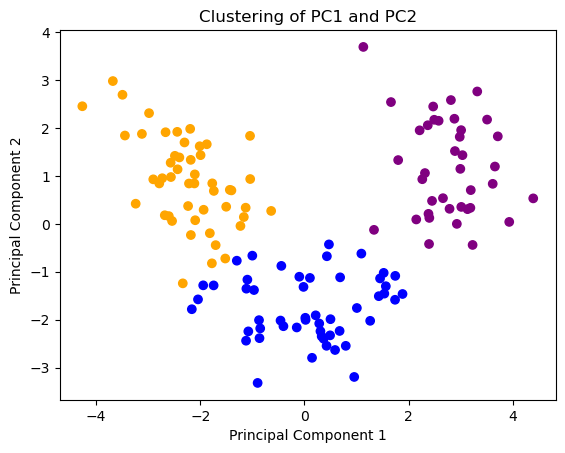

In [136]:
colors = {0:'blue', 1:'orange', 2:'purple'}
y_pred_colors = [colors[item] for item in y_pred]
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred_colors)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of PC1 and PC2')
plt.show()